### Multinomial Logistics Regression( Number of Labels >2)

Many times, there are classification problems where the number of classes is greater than 2. 
We can extend Logistic regression for multi-class classification. The logic is simple; we train our logistic model for each class and calculate the probability(hθx) that a specific feature belongs to that class. Once we have trained the model for all the classes, we predict a new value’s class by choosing that class for which the probability(hθx) is maximum.
Although we have libraries that we can use to perform multinomial logistic regression, we rarely use logistic regression for classification problems where the number of classes is more than 2.
There are many other classification models for such scenarios.


## Evaluation of a Classification Model

In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is?
For a  regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics
In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values.
In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted.
The different metrics used for this purpose are:
- Accuracy
- Recall
- Precision
- F1 Score
- Specifity
- AUC( Area Under the Curve)
- RUC(Receiver Operator Characteristic)

 ## Python Implementation

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [4]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head() # top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.tail() ## last 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Data Profiling :-

In [5]:
## Size of DataSet
data.shape

(768, 9)

There are 768 no. of rows and 9 no. of columns.

In [6]:
## Number of missing values per column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
## Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
## Number of duplicate rows
duplicate_data = data[data.duplicated()]
duplicate_data.shape

(0, 9)

There are 0 Duplicate rows in dataset

### Statistical Information
The statistics that are generated by the describe() method:

1) count tells us the number of NoN-empty rows in a feature.

2) mean tells us the mean value of that feature.

3) std tells us the Standard Deviation Value of that feature.

4) min tells us the minimum value of that feature.

5) 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6) max tells us the maximum value of that feature.

In [9]:
data.describe() ## Statistical Information from dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 ### Explotary Data Analysis :-

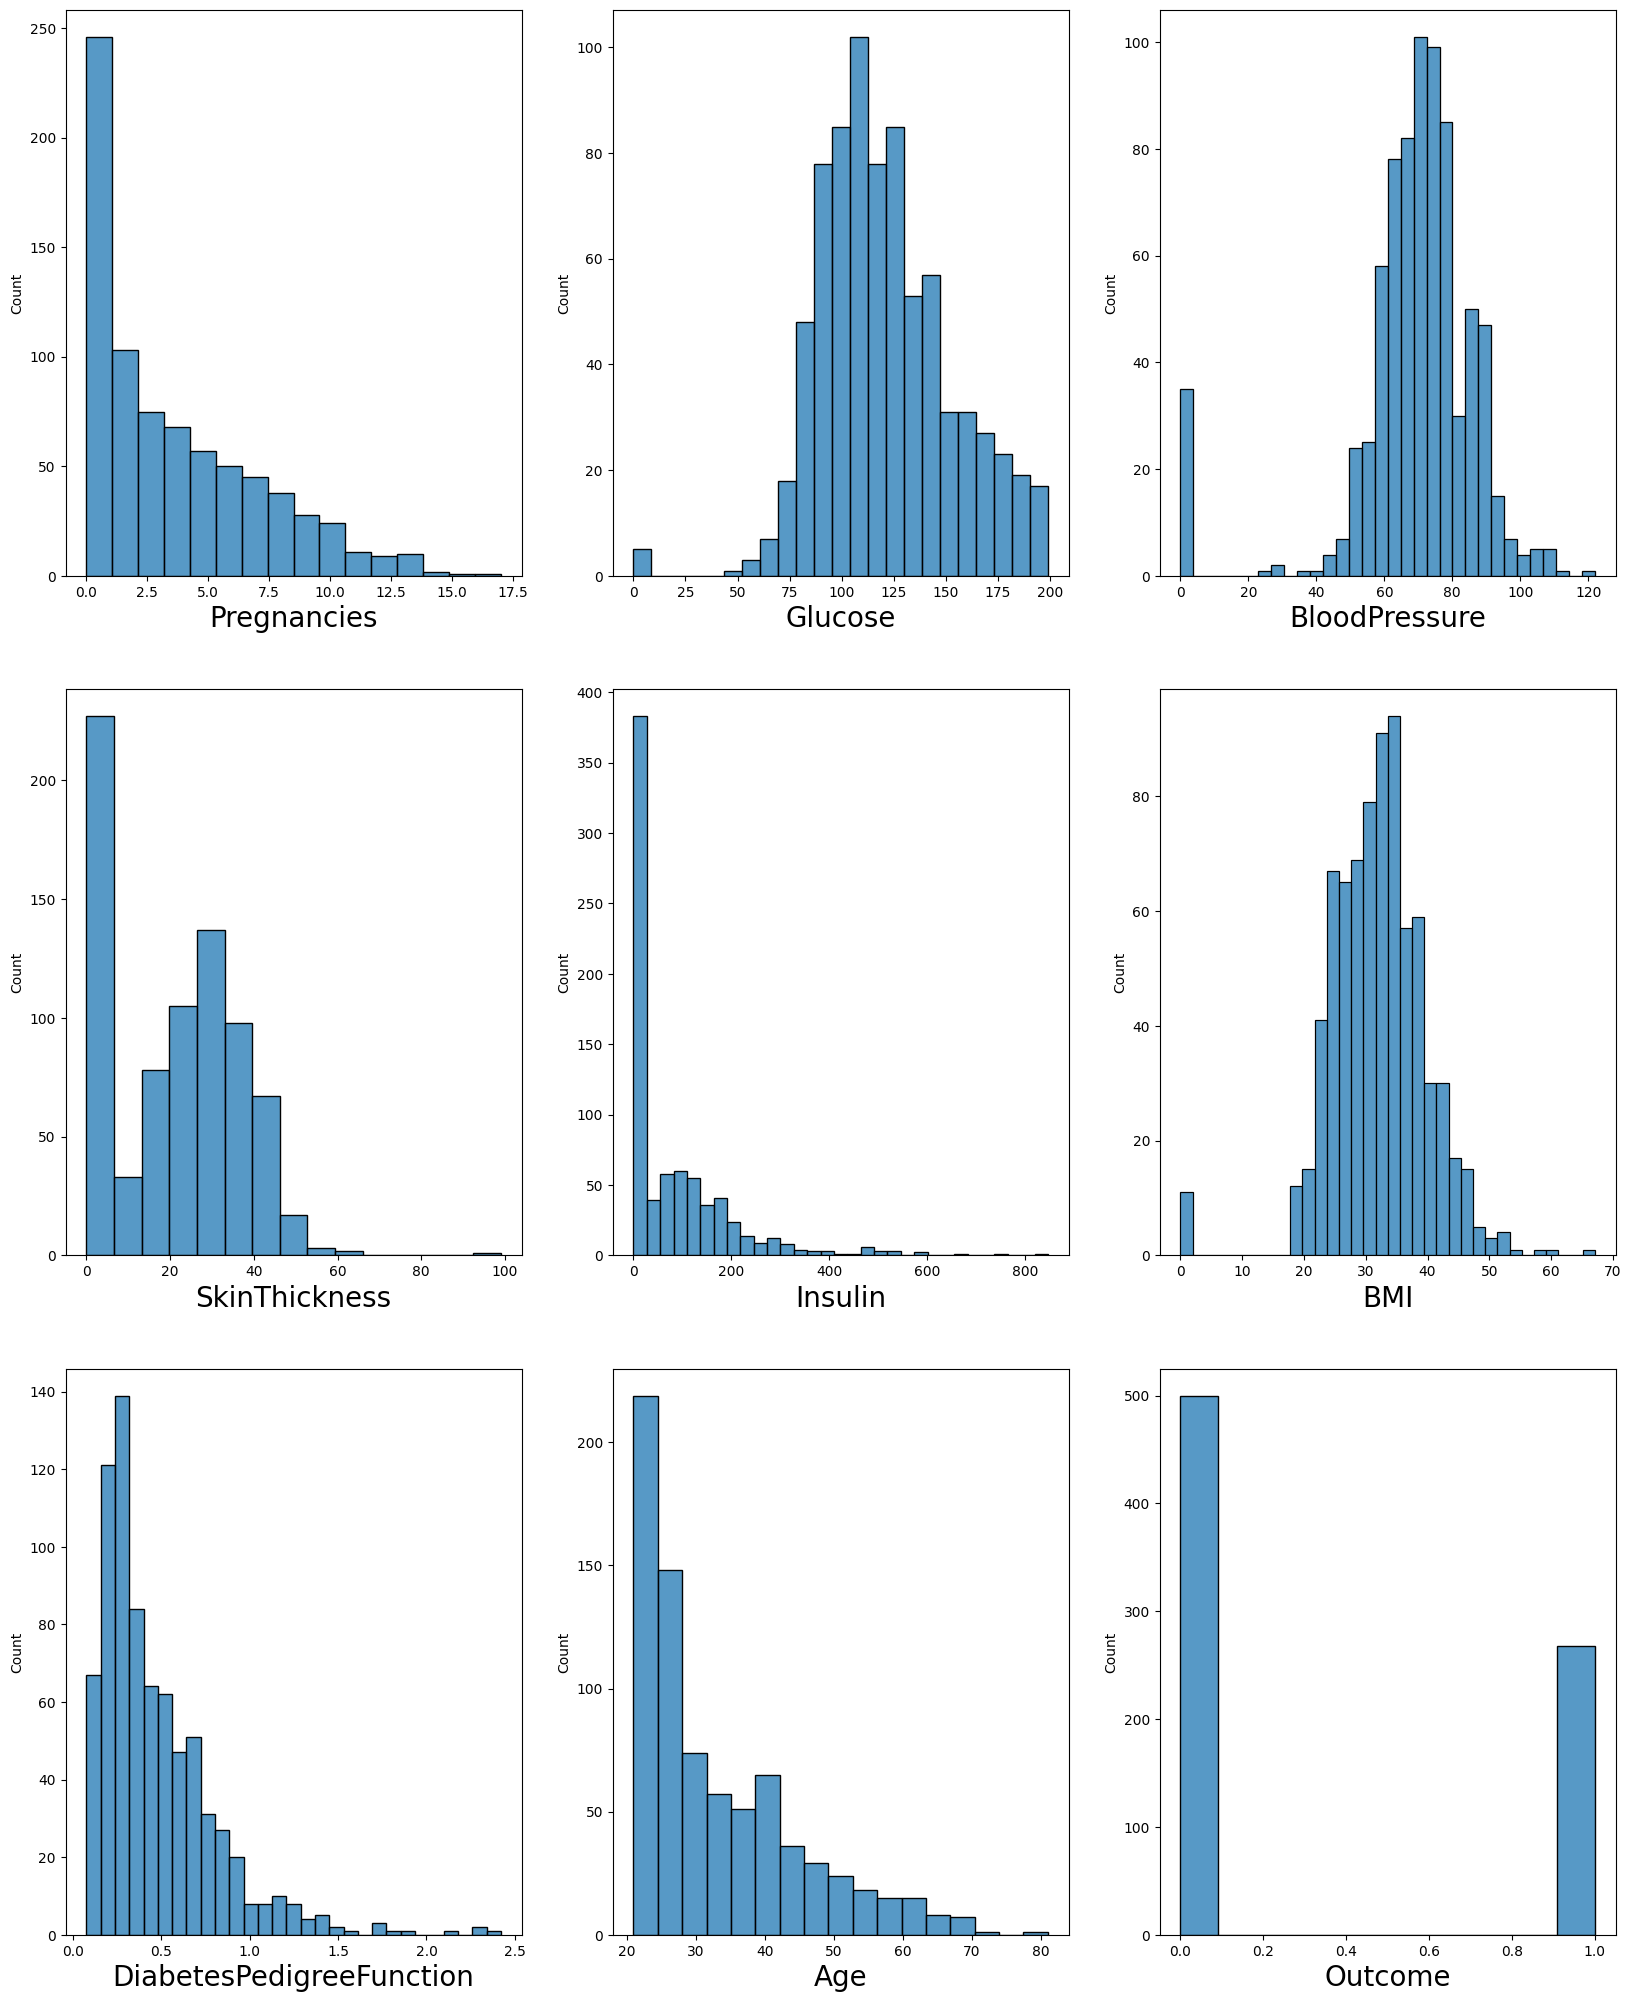

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [11]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

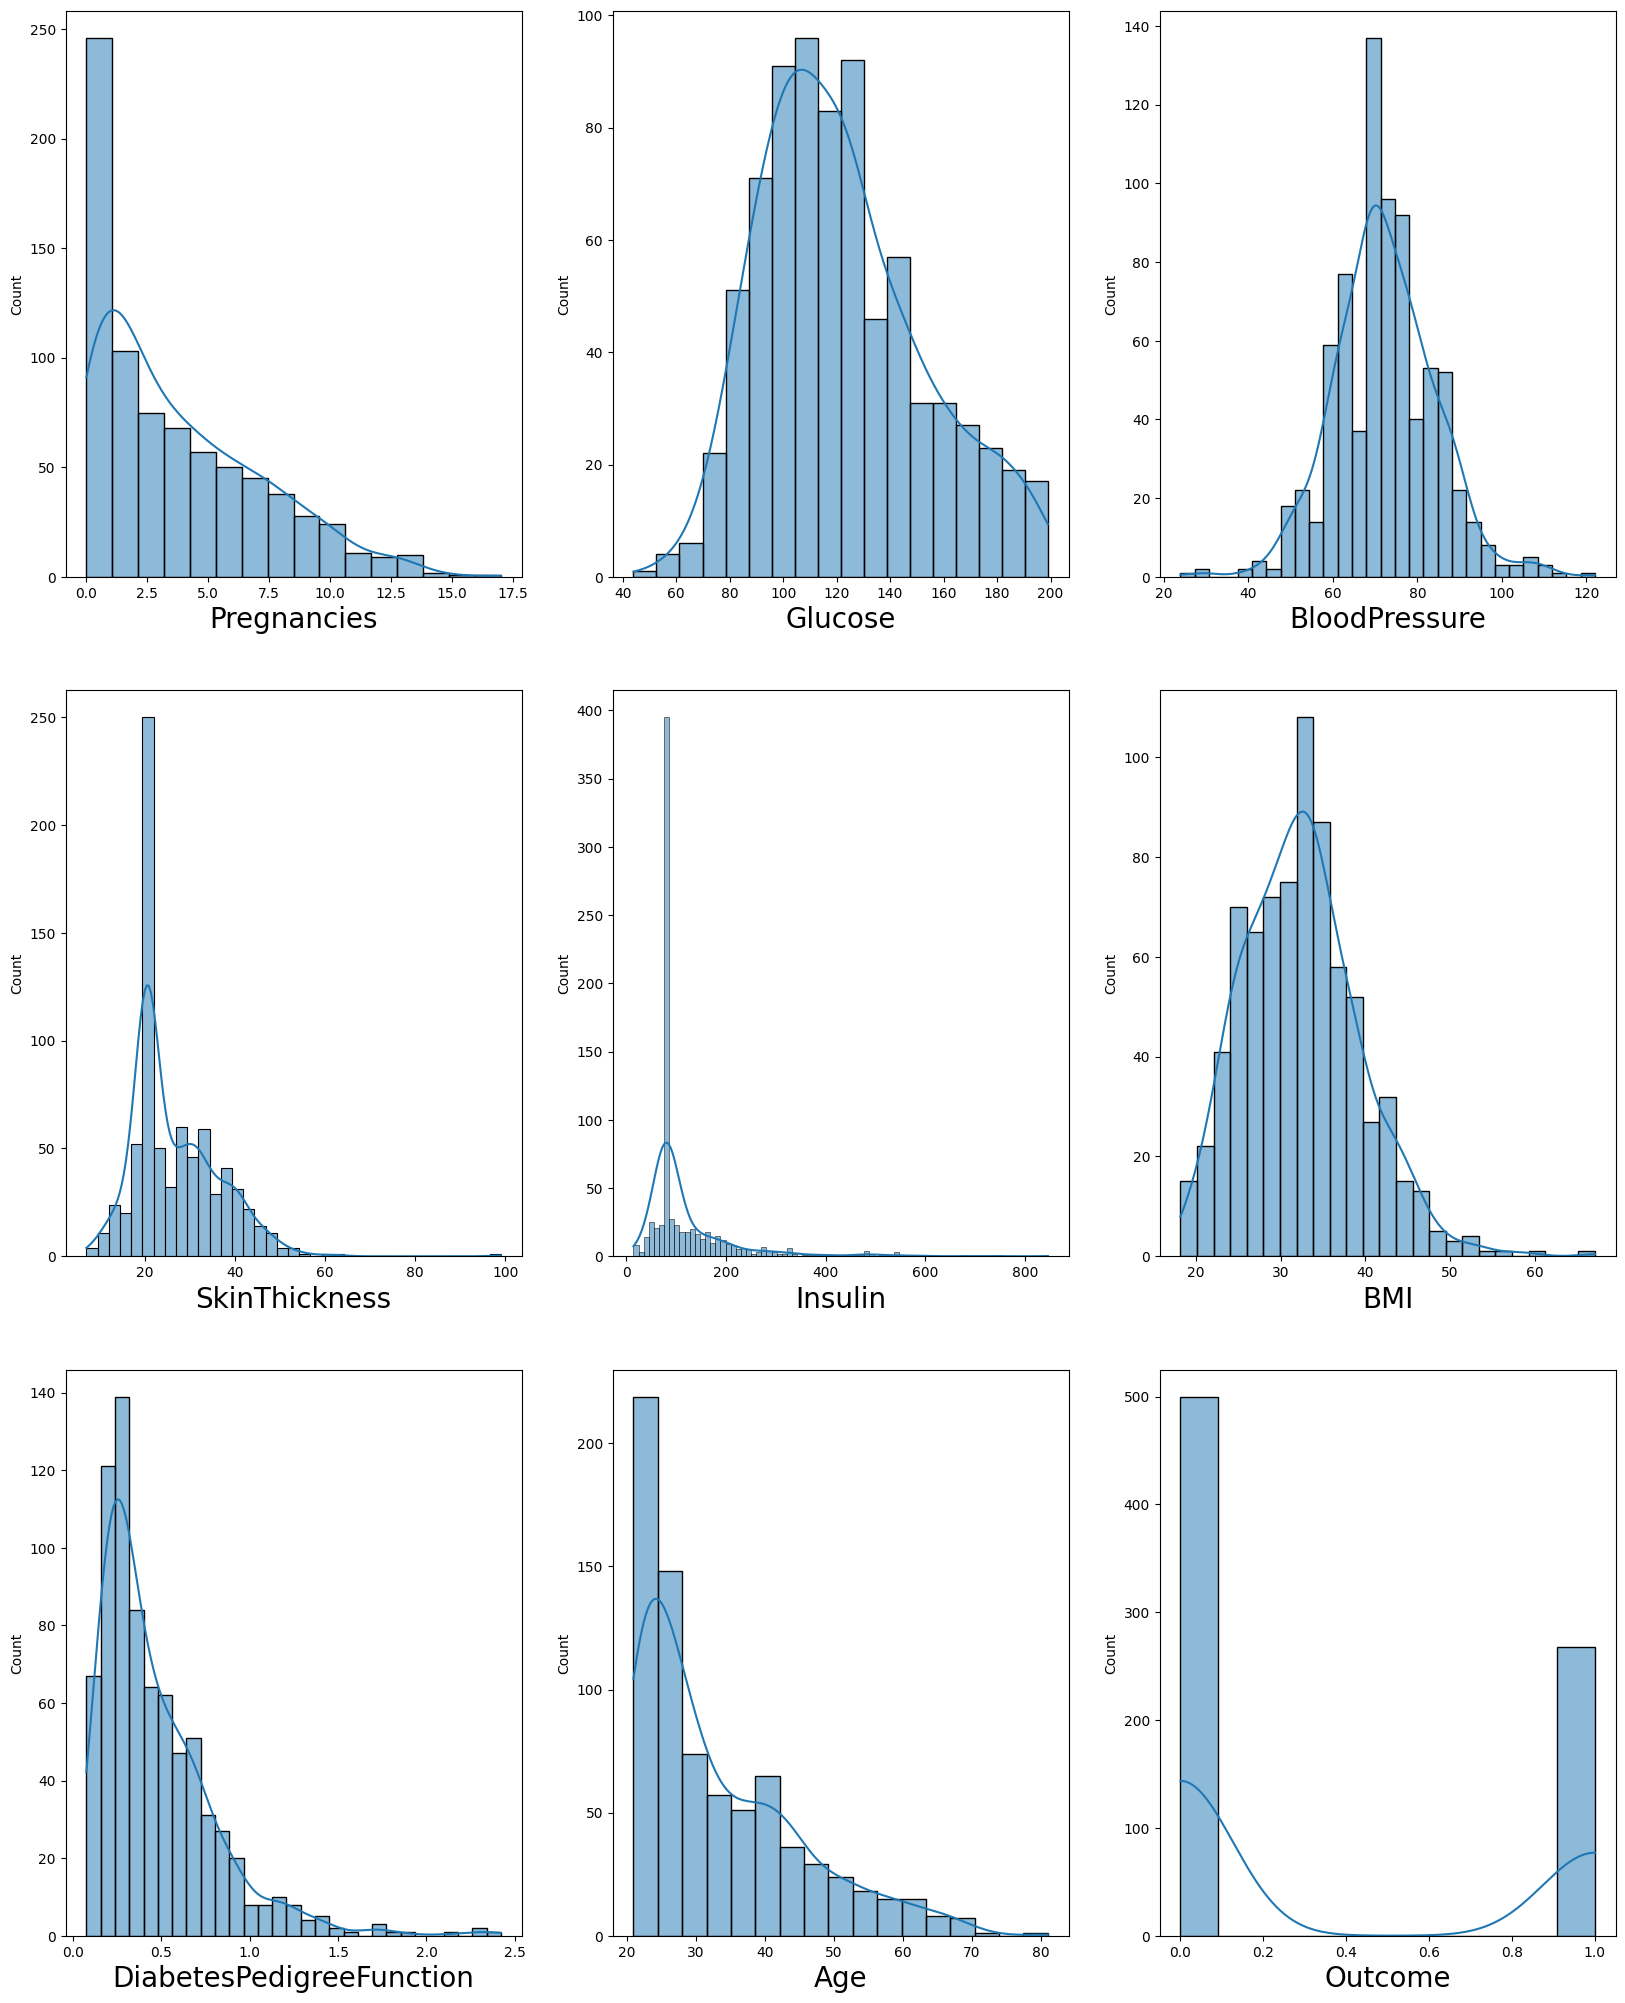

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
Let's deal with them.

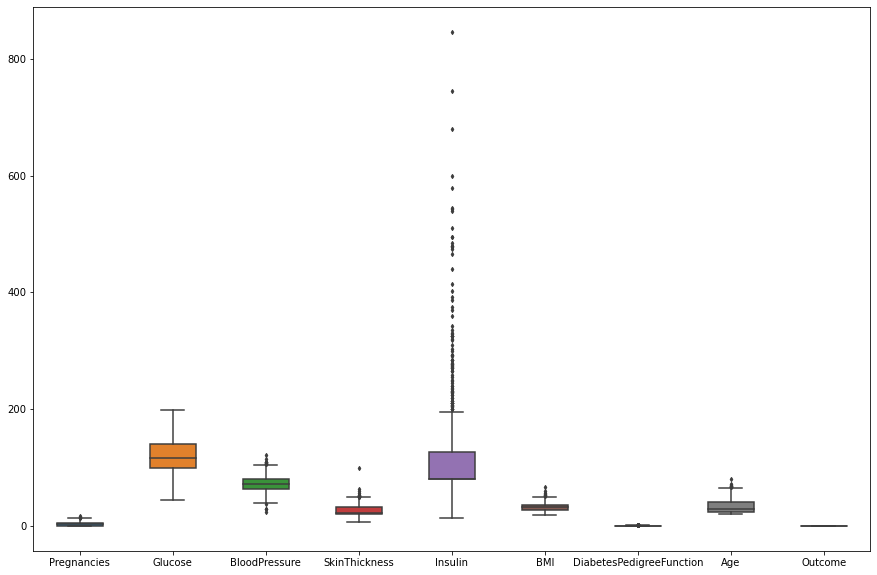

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

"BMI","Pregnancies","BloodPressure","SkinThickness","Insulin","Age" columns contain Outilers.

In [27]:
## Display percentage of Outilers
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Pregnancies outliers = 0.52%
Column Glucose outliers = 0.65%
Column BloodPressure outliers = 5.86%
Column SkinThickness outliers = 0.13%
Column Insulin outliers = 4.43%
Column BMI outliers = 2.47%
Column DiabetesPedigreeFunction outliers = 3.78%
Column Age outliers = 1.17%
Column Outcome outliers = 0.00%


In [17]:
q = data['Pregnancies'].quantile(0.99)
# we are removing the top 1% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['BloodPressure'].quantile(0.95)
# we are removing the top 5% data from the BloodPressure column
data_cleaned  = data_cleaned[data_cleaned['BloodPressure']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

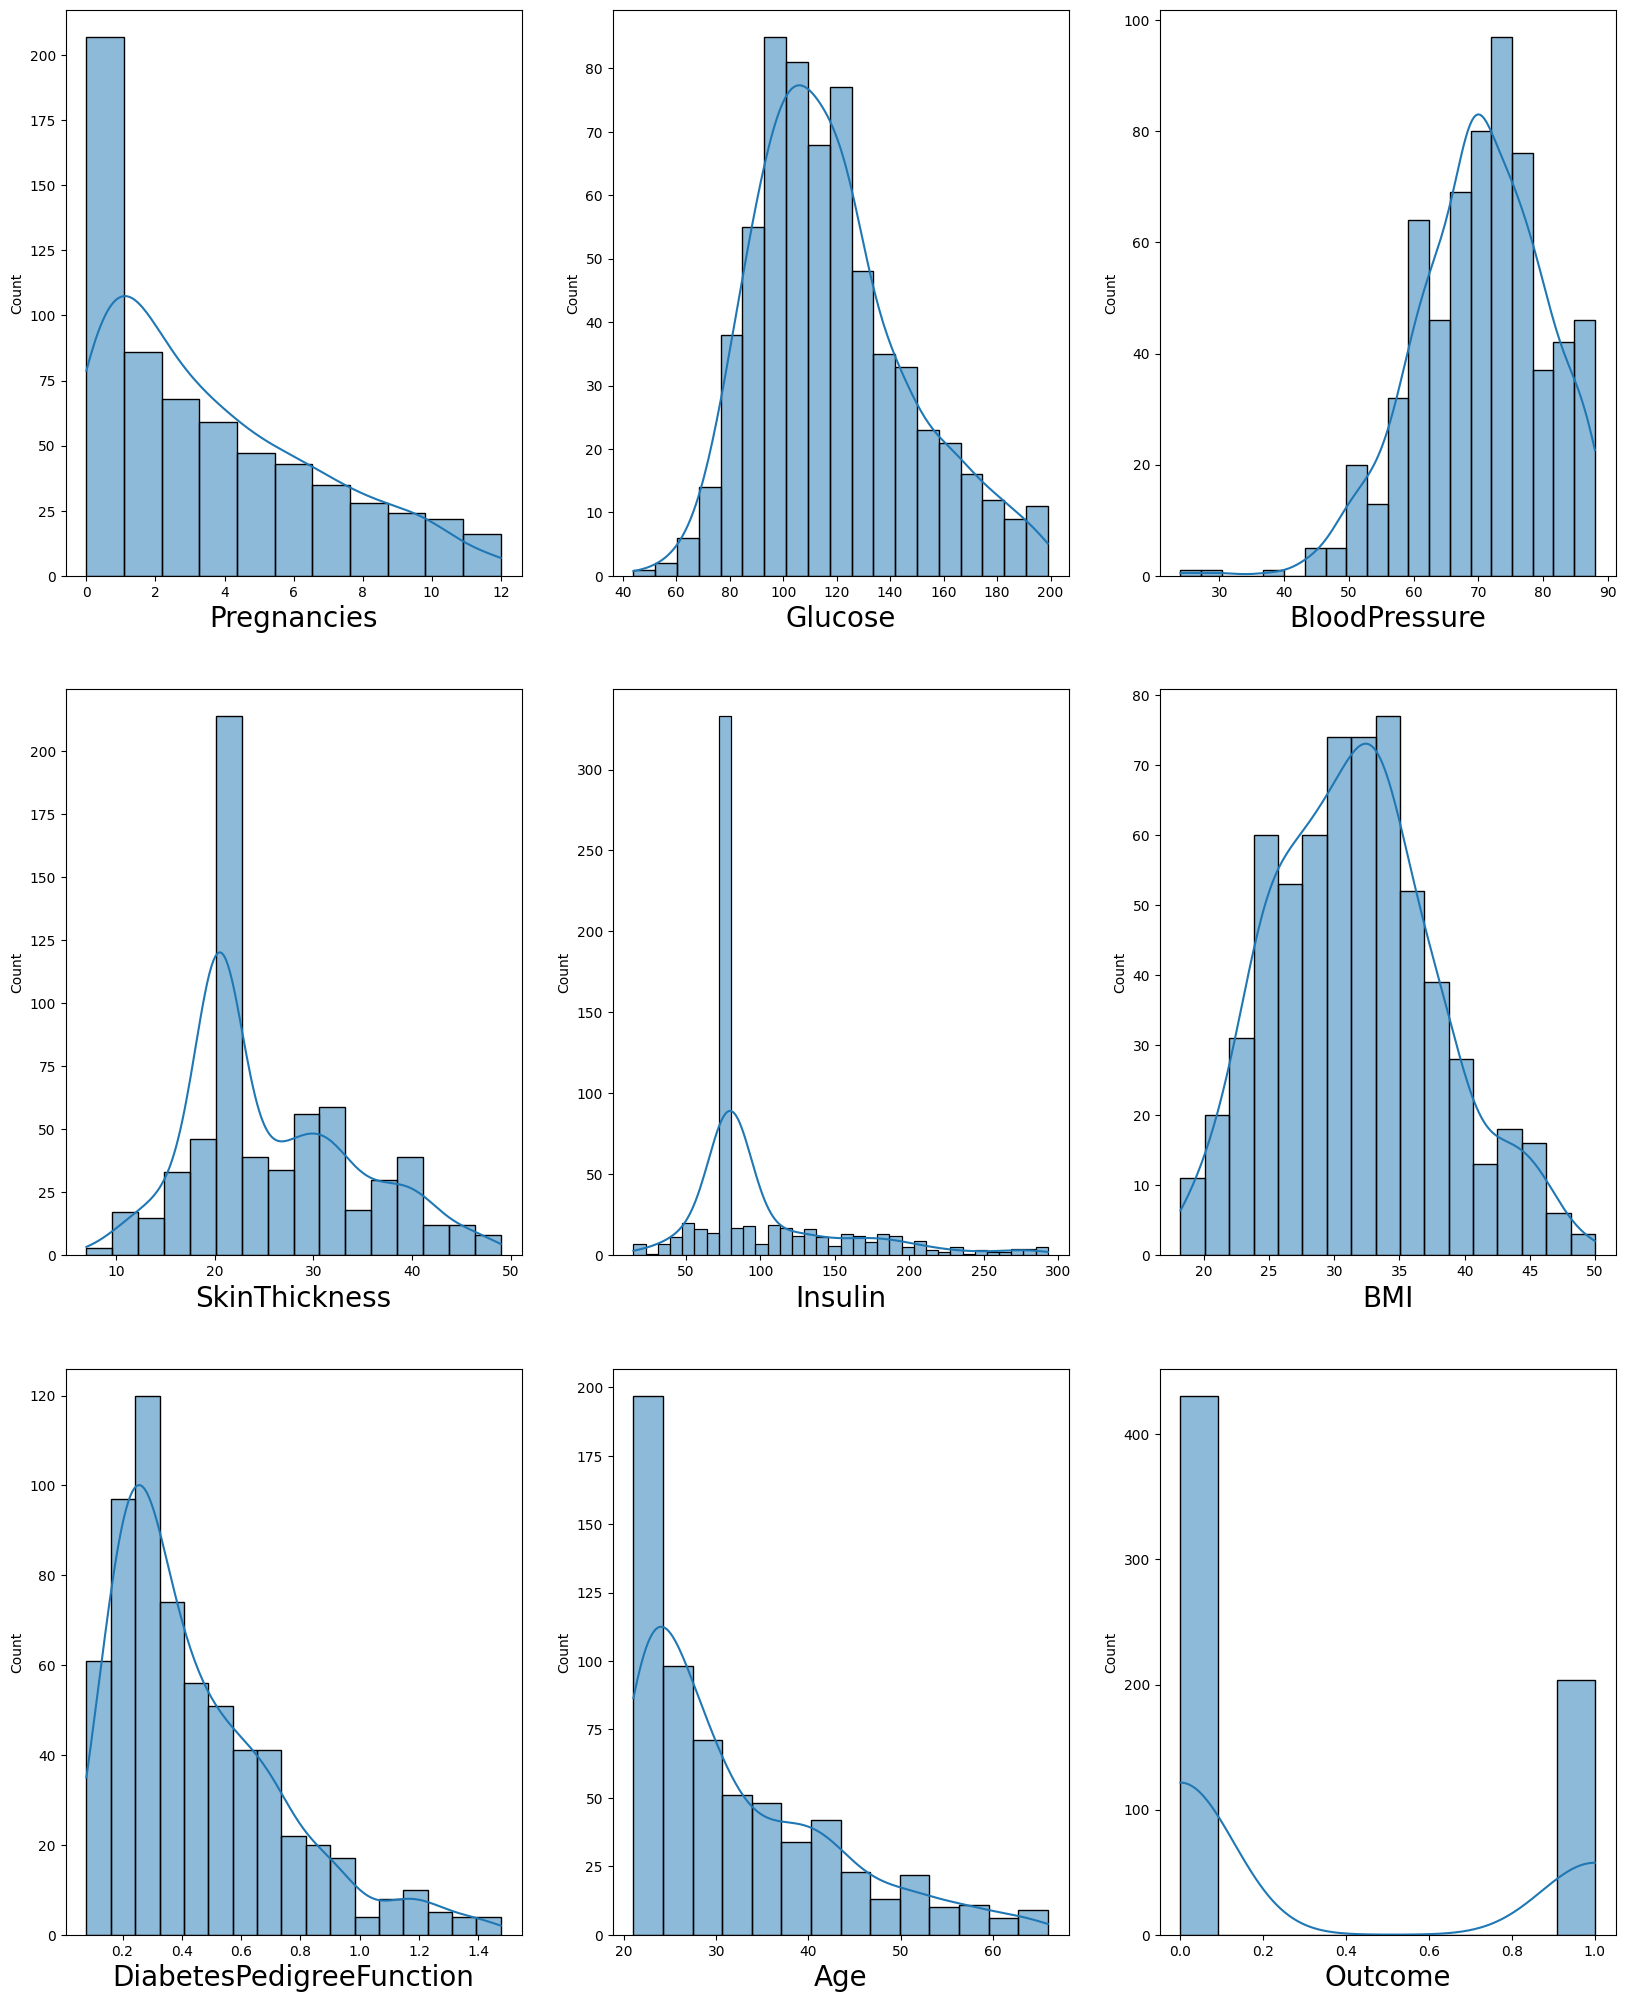

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data_cleaned[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


#### find the relationships between independent variables and dependent variable

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

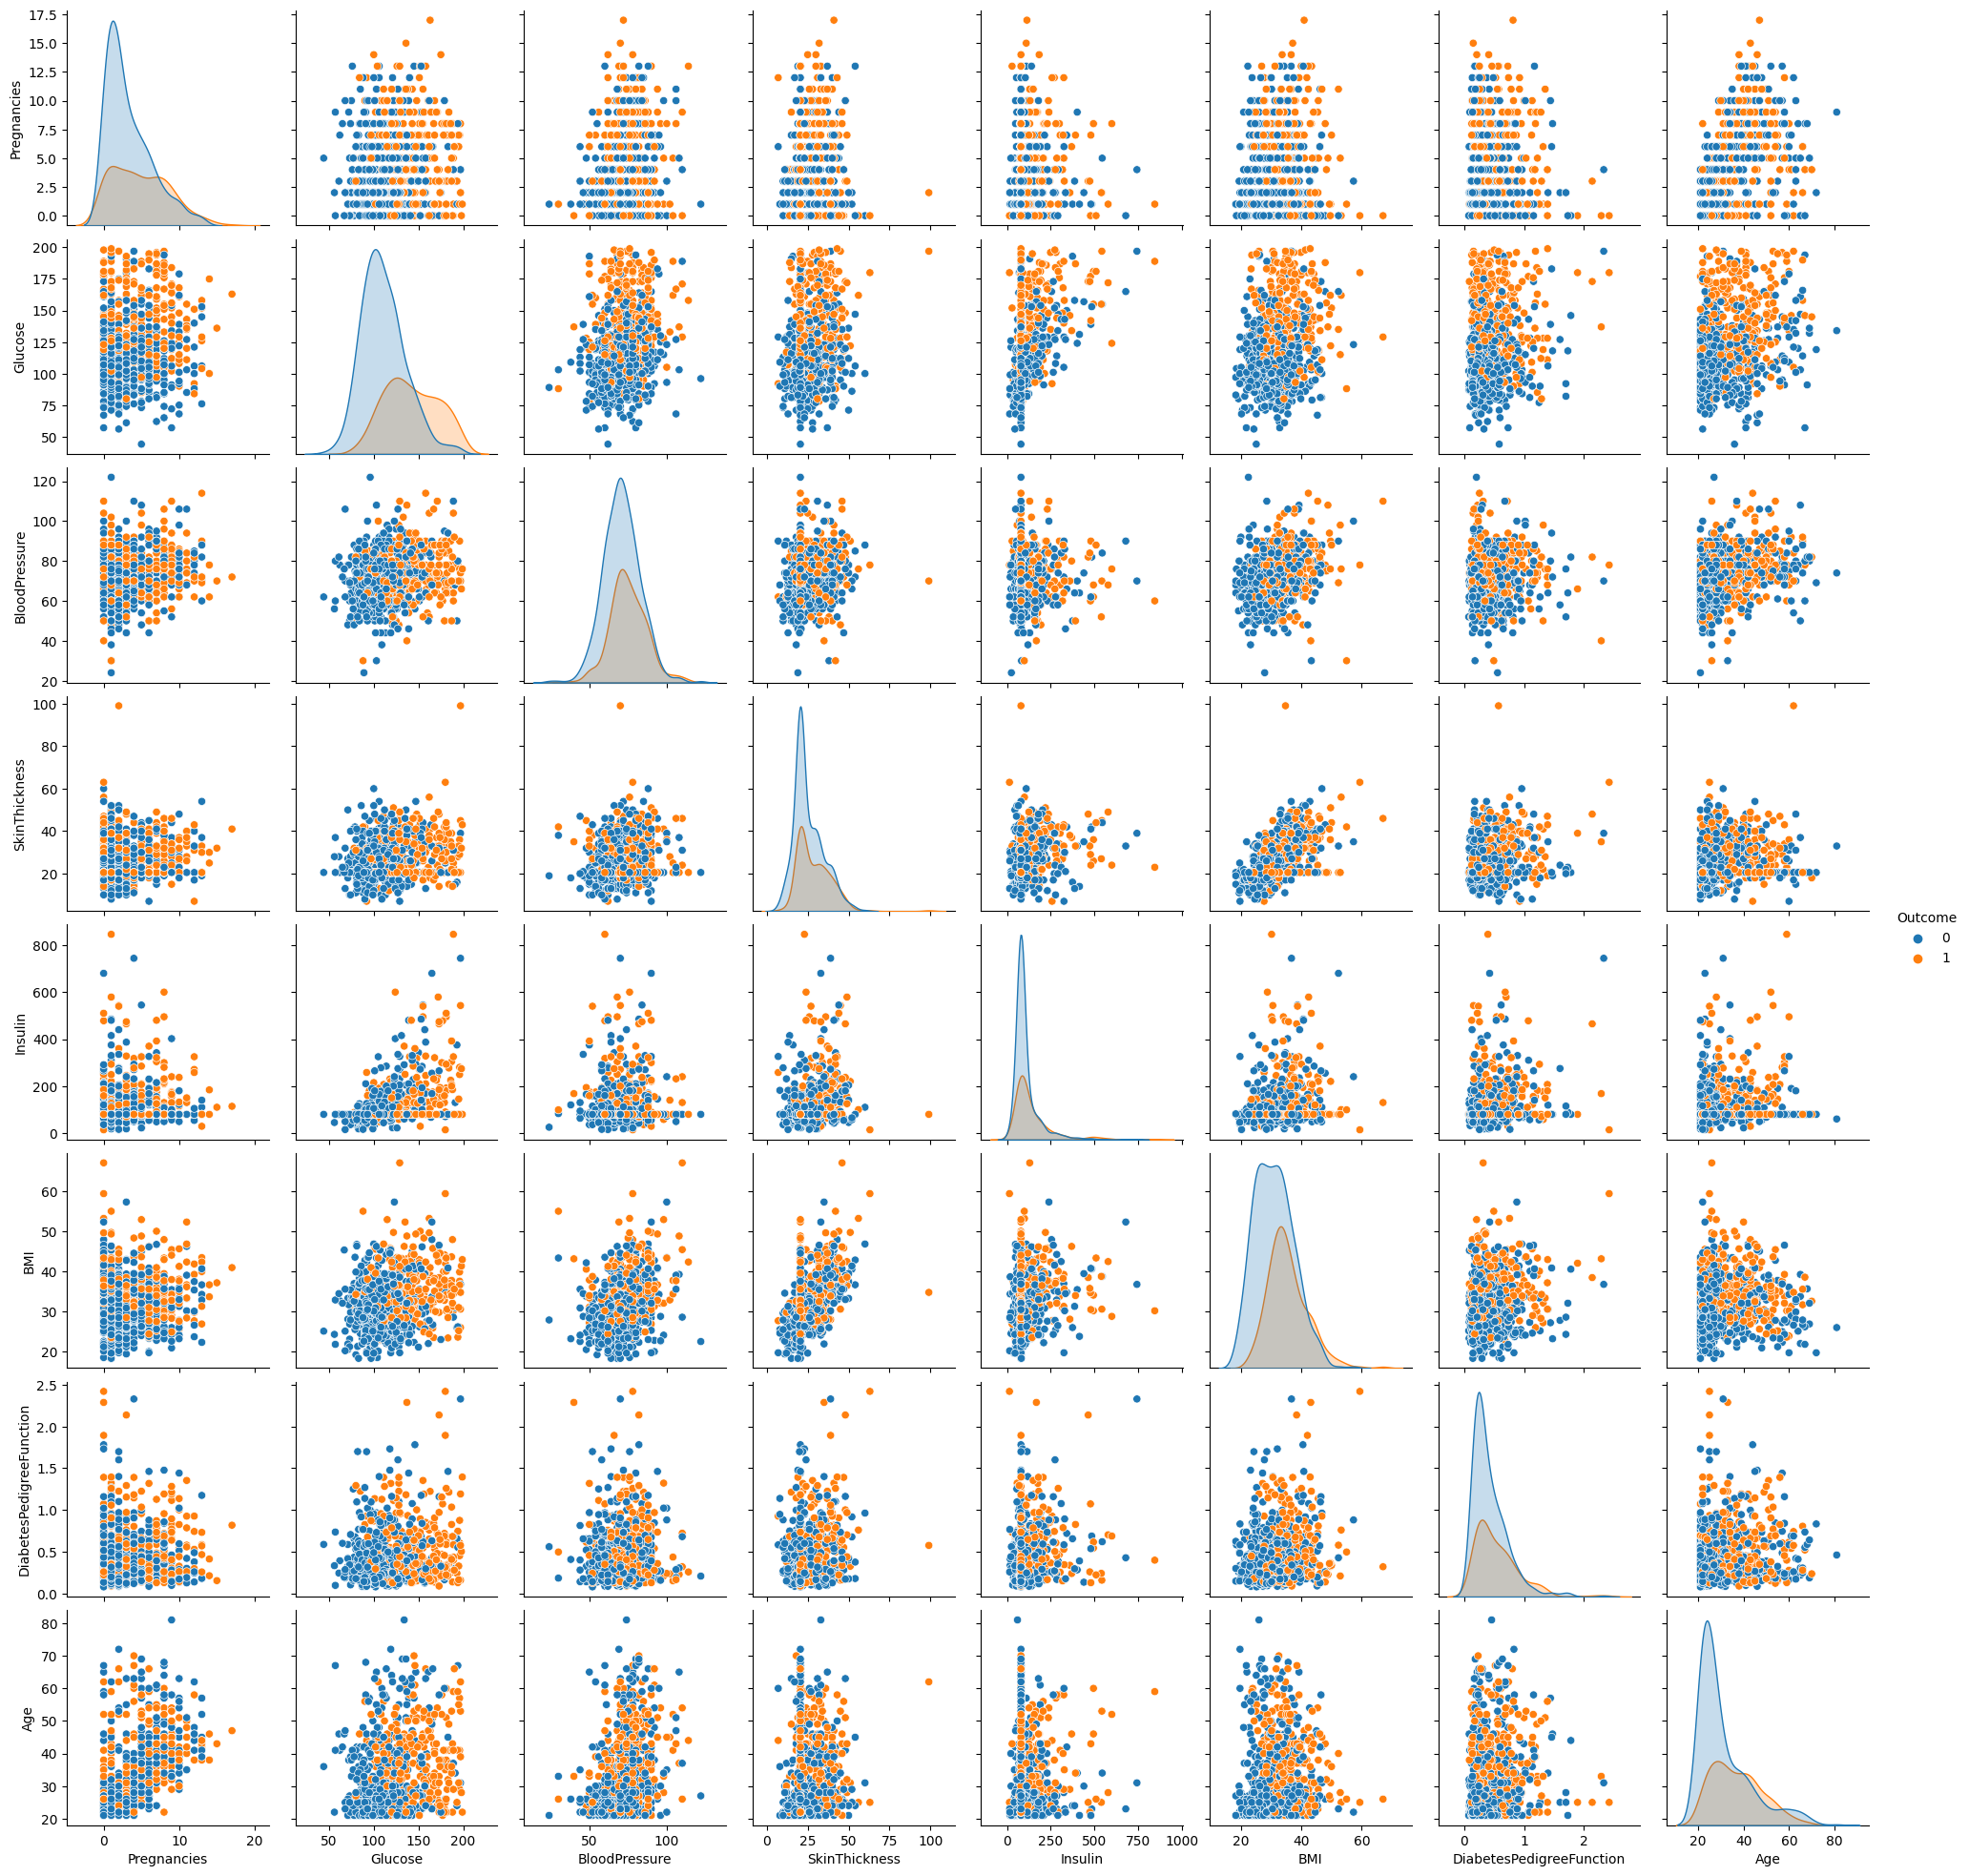

In [20]:
sns.pairplot(data = data,hue = "Outcome")

### Correlation between variables

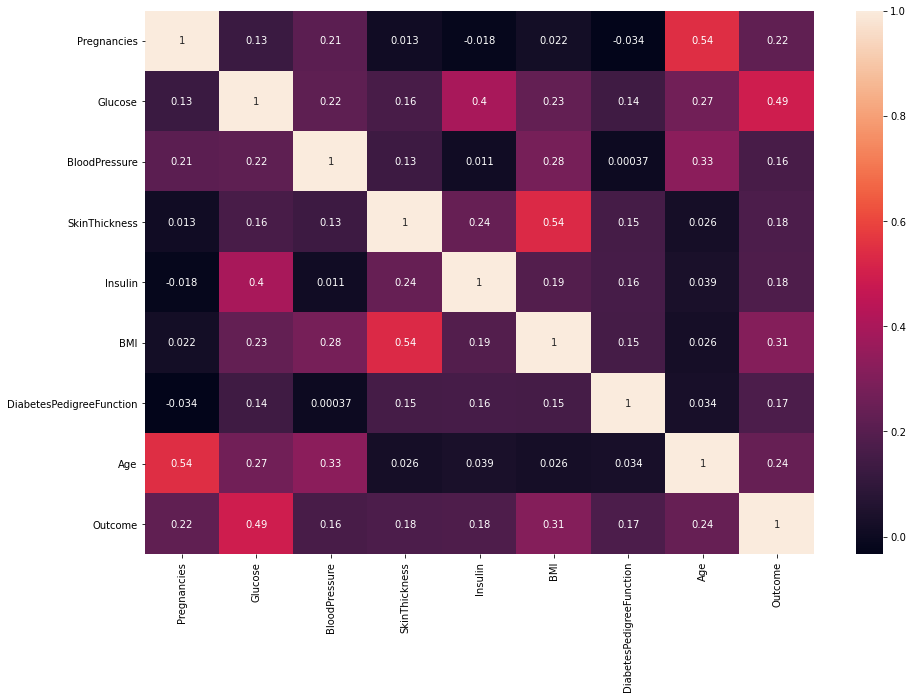

In [26]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data=data.corr(), annot=True)

In [22]:
#correlation value of "output" column with other columns
data.corr()['Outcome'][:-1].sort_values(ascending=False)

Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

### Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 
There are many types of Normalization techniques :-
    
    1) Guassian Transformation 
    
    2) Min-Max Scaling
    
Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

In [26]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt

In [27]:
## Function to check normal distribution 
def plot_data(d,feature) :
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    d[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(d[feature],dist = 'norm',plot=pylab)
    plt.show()

If our data is not normally distributed then we transform it.

1) for "Glucose" Column

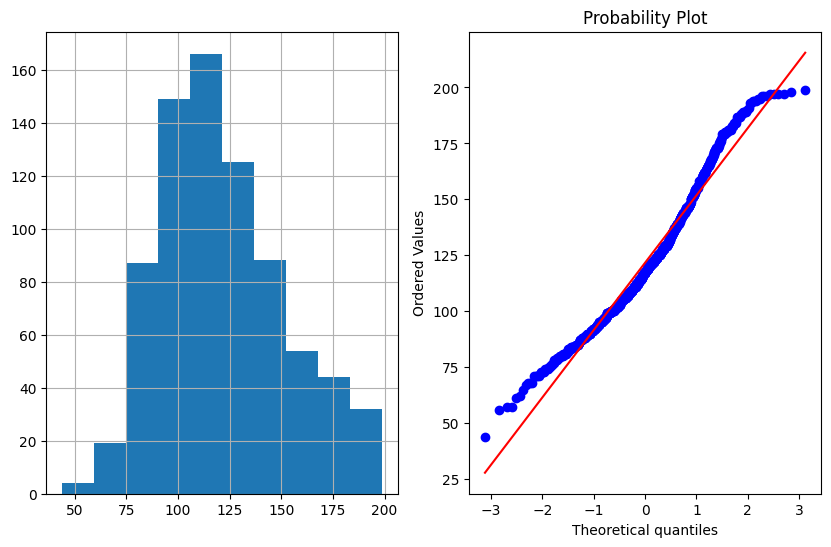

In [28]:
plot_data(data, "Glucose")

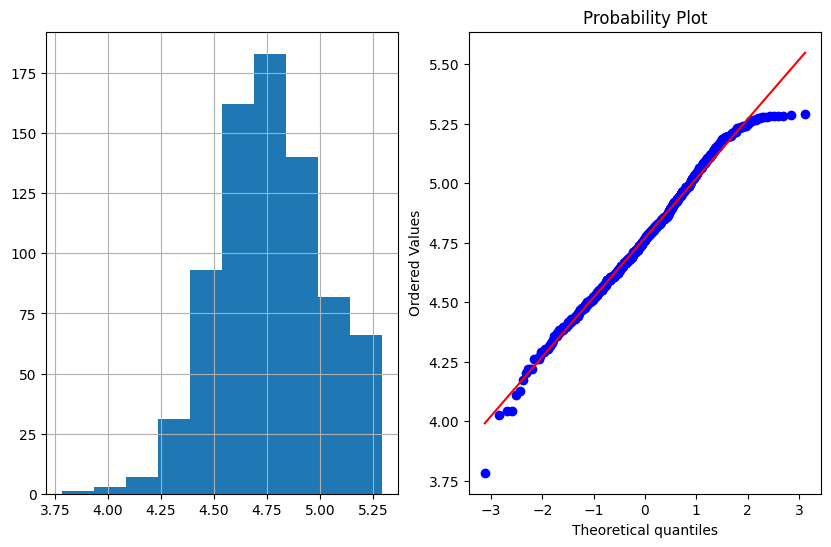

In [29]:
# Using logarithmic Transformation
data['log_Glucose'] = np.log(data['Glucose'])
plot_data(data,'log_Glucose')

#### Observation : logarithmic Transformation is best fit for "Glucose" Column
2) for "BMI" Column

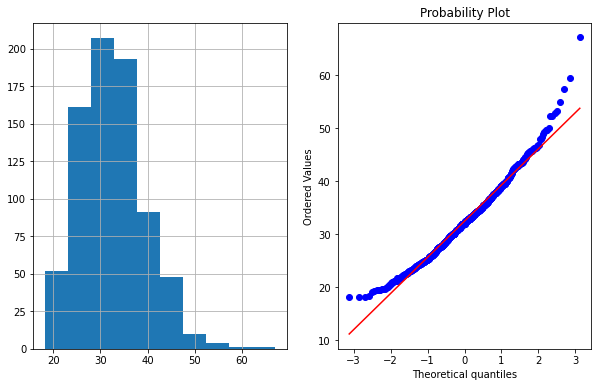

In [33]:
plot_data(data, "BMI")

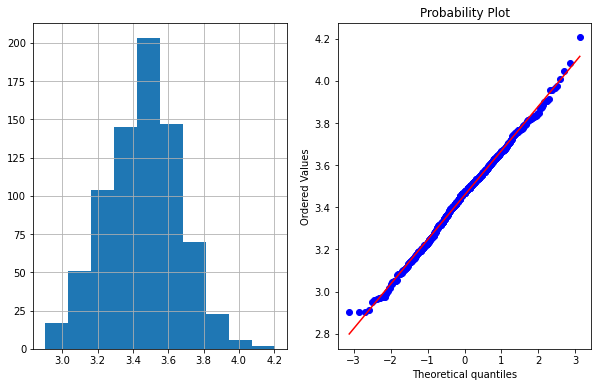

In [35]:
# Using Logarithmic Transformation
data['log_BMI'] = np.log(data['BMI'])
plot_data(data,'log_BMI')

#### Observation : logarithmic Transformation is best fit for "BMI" Column
3) for "Age" Column

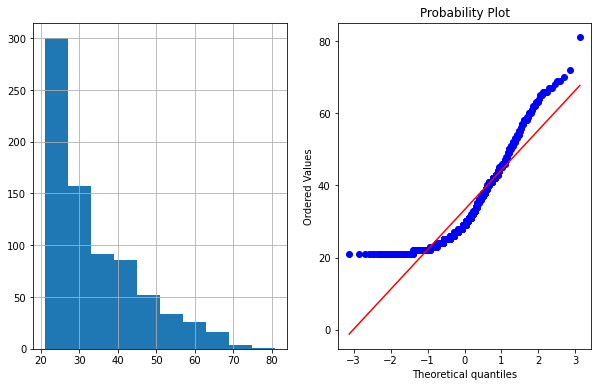

In [36]:
plot_data(data, "Age")

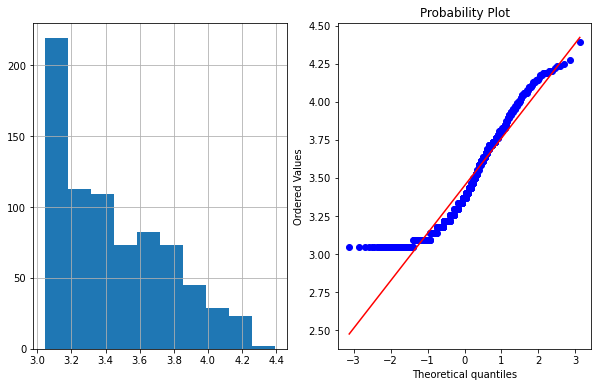

In [37]:
# Using Logarithmic Transformation
data['log_Age'] = np.log(data['Age'])
plot_data(data,'log_Age')

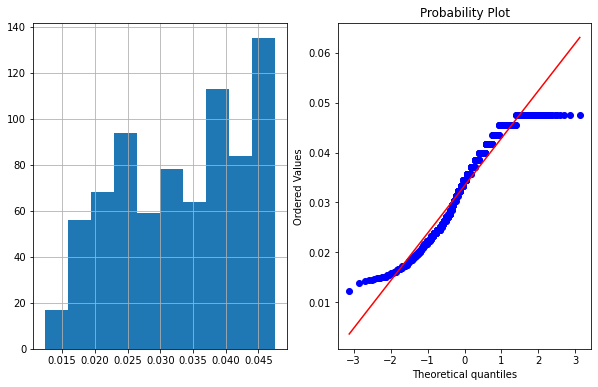

In [38]:
# Using Reciprocal Transformation
data['Reci_Age'] = 1/data['Age']
plot_data(data,'Reci_Age')

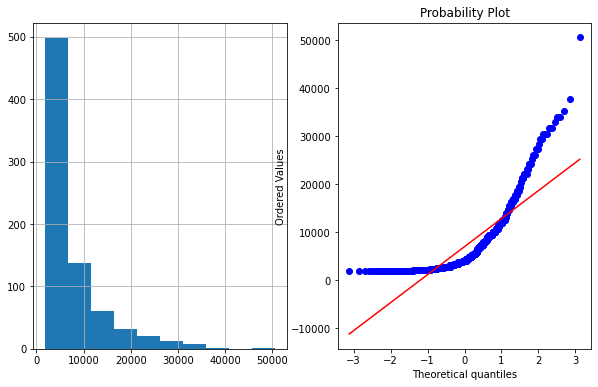

In [43]:
# Using Exponential  Transformation
e = 2.465
data['Exp_Age'] = data['Age']**e
plot_data(data,'Exp_Age')

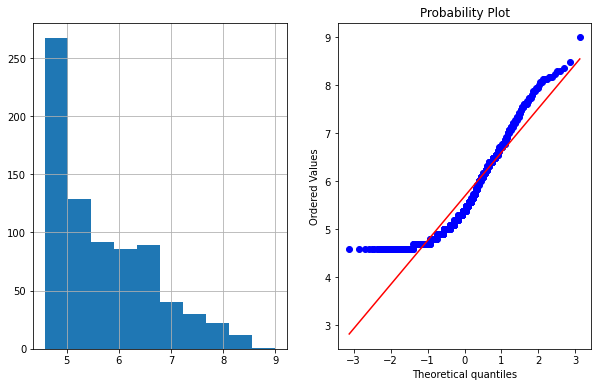

In [45]:
# Using Square root Transformation 
data['Sq_Age'] = np.sqrt(data['Age'])
plot_data(data,'Sq_Age')

#### Observation : Logarithmic Transformation is best fit for "Age" Column
4) For "Pregnancies" Column

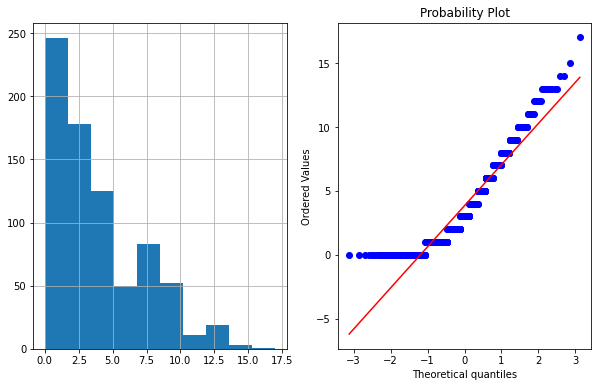

In [46]:
plot_data(data,'Pregnancies')

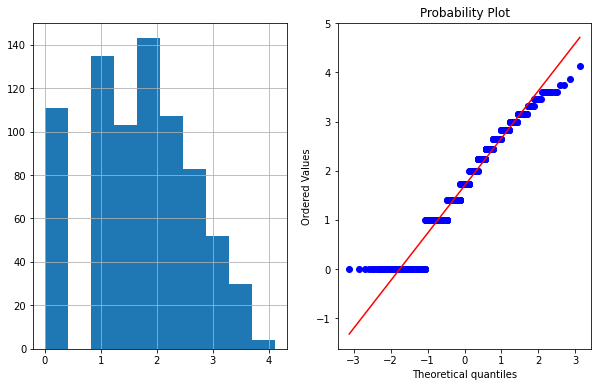

In [47]:
# Using Square root Transformation 
data['Sq_Pregnancies'] = np.sqrt(data['Pregnancies'])
plot_data(data,'Sq_Pregnancies')

#### Observation : Square root Transformation is best fit for "Pregnancies" Column
5) For "Insulin" Column

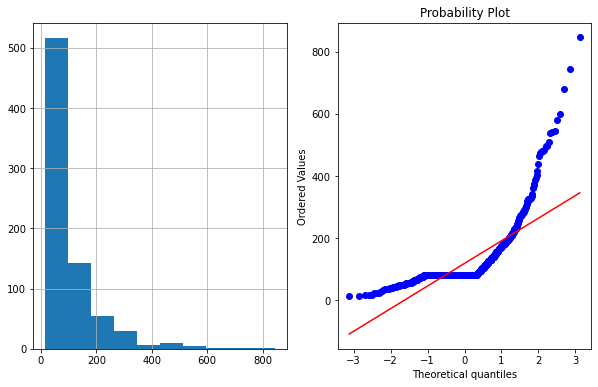

In [48]:
plot_data(data,'Insulin')

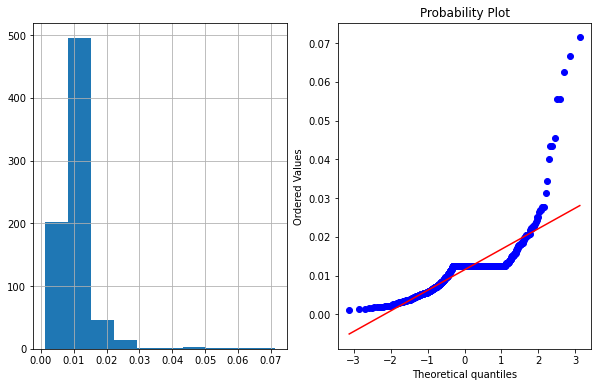

In [49]:
# Using Reciprocal Transformation
data['Reci_Insulin'] = 1/data['Insulin']
plot_data(data,'Reci_Insulin')

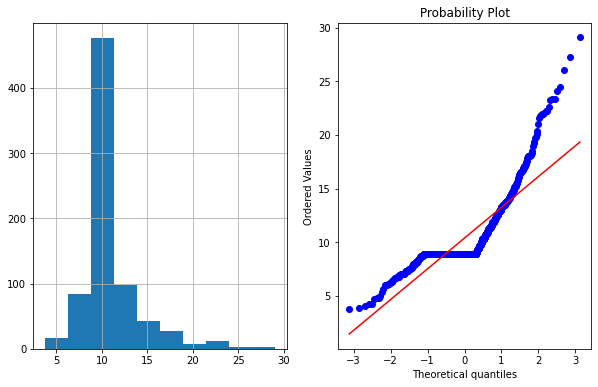

In [50]:
# Using Square root Transformation 
data['Sq_Insulin'] = np.sqrt(data['Insulin'])
plot_data(data,'Sq_Insulin')

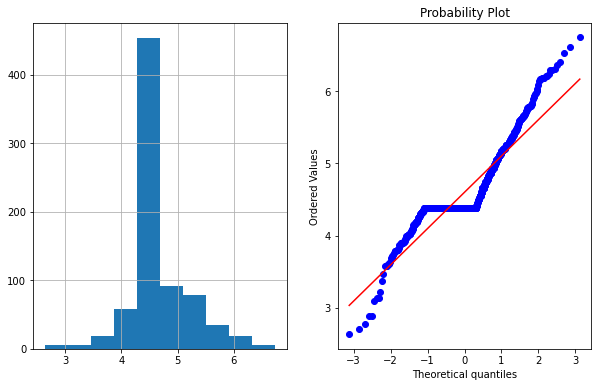

In [51]:
# Using logarithmic Transformation
data['log_Insulin'] = np.log(data['Insulin'])
plot_data(data,'log_Insulin')

#### Observation : Reciprocal Transformation is best fit for "Insulin" Column
6) for "SkinThickness" Column

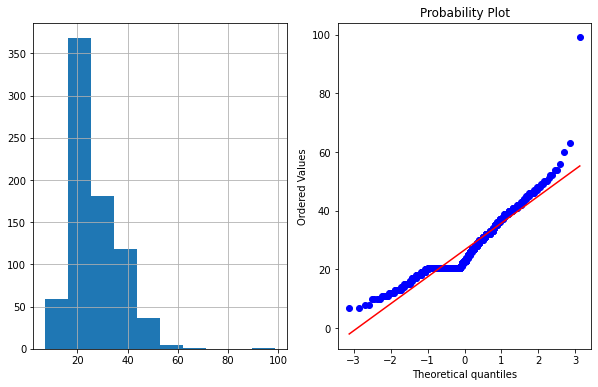

In [52]:
plot_data(data,'SkinThickness')

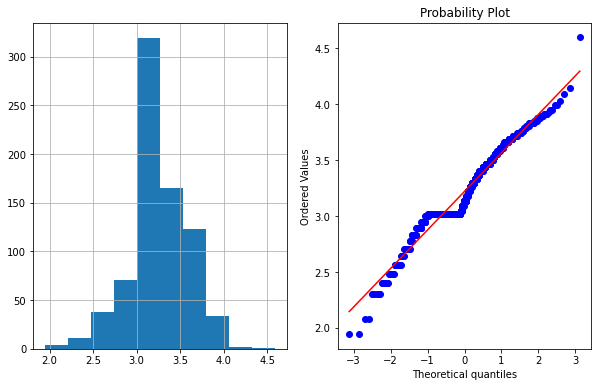

In [53]:
# Using logarithmic Transformation
data['log_SkinThickness'] = np.log(data['SkinThickness'])
plot_data(data,'log_SkinThickness')

#### Observation : logarithmic Transformation is best fit for "SkinThickness" Column
7) for "DiabetesPedigreeFunction" Column

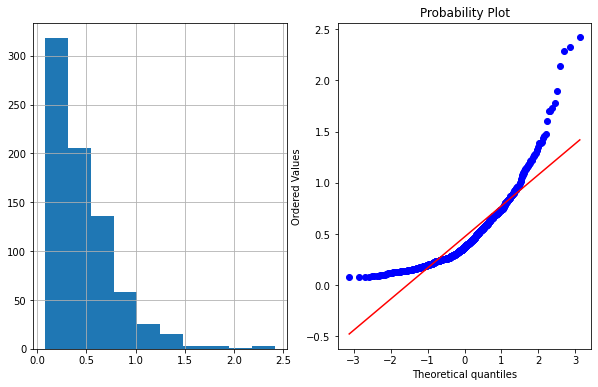

In [54]:
plot_data(data,'DiabetesPedigreeFunction')

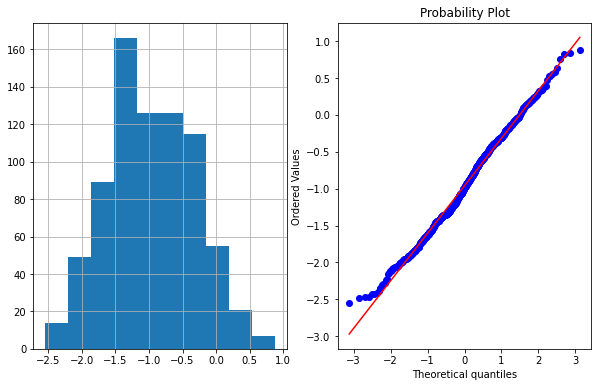

In [55]:
# Using logarithmic Transformation
data['log_DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])
plot_data(data,'log_DiabetesPedigreeFunction')

#### Observation : logarithmic Transformation is best fit for "DiabetesPedigreeFunction" Column¶
8) for "BloodPressure" Column

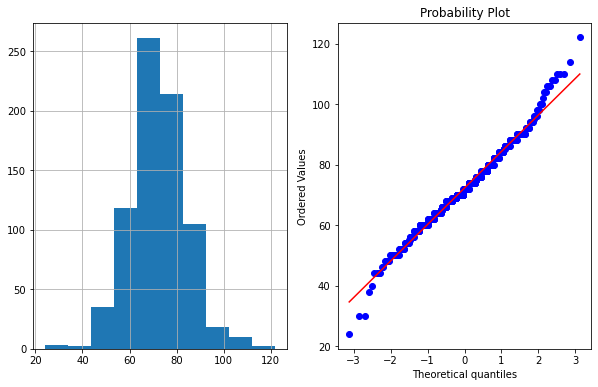

In [56]:
plot_data(data,'BloodPressure')

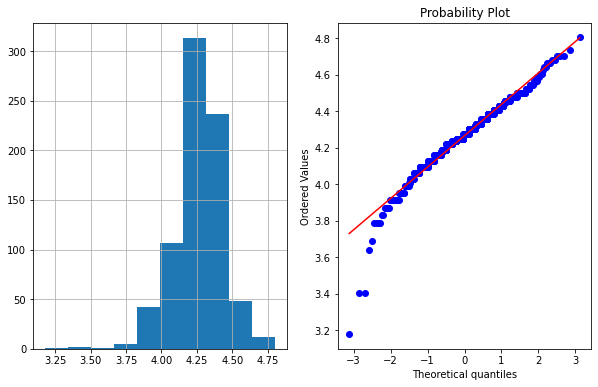

In [57]:
# Using logarithmic Transformation
data['log_BloodPressure'] = np.log(data['BloodPressure'])
plot_data(data,'log_BloodPressure')

#### Observation : logarithmic Transformation is best fit for "BloodPressure" Column
### Data set after Normalization

In [58]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_Glucose,...,Reci_Age,Exp_Age,Sq_Age,Sq_Pregnancies,Reci_Insulin,Sq_Insulin,log_Insulin,log_SkinThickness,log_DiabetesPedigreeFunction,log_BloodPressure
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,4.997212,...,0.020000,15415.622286,7.071068,2.449490,0.012531,8.933055,4.379517,3.555348,-0.466809,4.276666
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,4.442651,...,0.032258,4744.676155,5.567764,1.000000,0.012531,8.933055,4.379517,3.367296,-1.046969,4.189655
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,5.209486,...,0.031250,5130.913541,5.656854,2.828427,0.012531,8.933055,4.379517,3.022202,-0.397497,4.158883
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,4.488636,...,0.047619,1816.647065,4.582576,1.000000,0.010638,9.695360,4.543295,3.135494,-1.789761,4.189655
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,4.919981,...,0.030303,5535.245172,5.744563,0.000000,0.005952,12.961481,5.123964,3.555348,0.827678,3.688879


In [59]:
dataset = data[["log_BMI","log_Glucose","log_Age","Sq_Pregnancies","Reci_Insulin","log_SkinThickness","log_DiabetesPedigreeFunction","log_BloodPressure","Outcome"]] 
dataset.head()

,log_BMI,log_Glucose,log_Age,Sq_Pregnancies,Reci_Insulin,log_SkinThickness,log_DiabetesPedigreeFunction,log_BloodPressure,Outcome
0,3.514526,4.997212,3.912023,2.449490,0.012531,3.555348,-0.466809,4.276666,1
1,3.280911,4.442651,3.433987,1.000000,0.012531,3.367296,-1.046969,4.189655,0
2,3.148453,5.209486,3.465736,2.828427,0.012531,3.022202,-0.397497,4.158883,1
3,3.335770,4.488636,3.044522,1.000000,0.010638,3.135494,-1.789761,4.189655,0
4,3.763523,4.919981,3.496508,0.000000,0.005952,3.555348,0.827678,3.688879,1


### Standardization

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:
<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif">

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if we have outliers in we data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on our problem and the machine learning algorithm we are using. There is no hard and fast rule to tell us when to normalize or standardize our data.we can always start by fitting our model to raw, normalized and standardized data and compare the performance for best results.

In [33]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [35]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [36]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.46849198,
         1.4259954 ,  0.90856252],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.36506078,
        -0.19067191, -1.31367612],
       [ 1.23388019,  2.01597855, -0.68176235, ...,  0.60439732,
        -0.10558415,  1.75918707],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.68519336,
        -0.27575966,  0.10142474],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.37110101,
         1.17073215,  0.26368185],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.47378505,
        -0.87137393, -0.95323526]])

In [38]:
dataset_scaled = pd.DataFrame(X_scaled,columns=data.columns[:-1])
dataset_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,0.908563
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,-1.313676
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1.759187
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,-1.129404
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,0.599081


### Splitting Of Data Into Train And test

In [39]:
x_train,x_test,y_train,y_test = train_test_split(dataset_scaled,y, test_size= 0.25, random_state = 355)

In [40]:
x_train.shape , x_test.shape

((576, 9), (192, 9))

### Implementation of Logistic Regression Algorithm

In [43]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

Let's see how well our model performs on the test data set.


In [44]:
y_pred = log_reg.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.75

In [46]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  16],
       [ 32,  35]], dtype=int64)

In [47]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [48]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.75

In [49]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.872

In [50]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7730496453900709

In [51]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8195488721804511

In [52]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6971940298507462

**ROC**

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

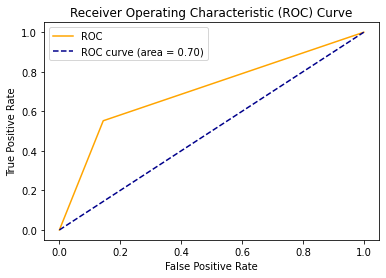

In [79]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes




